In [4]:
# load dependencies'
import similaritymeasures
import movingpandas as mpd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from envirocar import *

#Avoid warning message 
pd.options.mode.chained_assignment=None

In [6]:
# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()
track_converter = TrackConverter()

Initializing pre-processing class
Initializing TrackConverter class


# Similarity measures

## Track by track similarity measures

Let's start by selecting two tracks from the envirocar track API.

In [8]:
bbox = BboxSelector([
    7.5, # min_x
    51.5, # min_y
    7.7, # max_x
    52  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=2) 

Now we can create a **movingpandas** trajectoryCollection object by using our preprocessing module object and plot it ! 

In [6]:
trajCollection = preprocessing.trajectoryCollection(track_df, 100)

Finished creating 2 trajectories


In [7]:
trajCollection.hvplot(line_width=7.0, tiles='StamenTonerBackground',title="Trajectories")

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

We can analyse the similarity of two tracks (trajA and trajB) by using our implementation of the **similaritymeasures** package in our **trajectories_similarity** module. This package includes 5 diferent methods to compare tracks. 

## TrajA and TrajA similarity

Let's first start by comparing a track with itself. As a principle a track would have a similarity of 1 if compared with and exact copy of itself.

In [9]:
trajA=trajCollection.trajectories[0]

print('##### Track:',trajA.df['track.id'].unique()[0],"and",trajA.df['track.id'].unique()[0],"#####")
print('Similarity with pmc method:\t\t',track_similarity(trajA,trajA,'pcm'))
print('Similarity with area method:\t\t',track_similarity(trajA,trajA,'area_between_two_curves'))
print('Similarity with length method:\t\t',track_similarity(trajA,trajA,'curve_length_measure'))
print('Similarity with frechet method:\t\t',track_similarity(trajA,trajA,'frechet_dist'))
print('Similarity with DTW method\t\t',track_similarity(trajA,trajA,'dtw'))

##### Track: 5efc2200d6e3cf256ba1a13b and 5efc2200d6e3cf256ba1a13b #####
Similarity with pmc method:		 1.0
Similarity with area method:		 1.0
Similarity with length method:		 1.0
Similarity with frechet method:		 1.0
Similarity with DTW method		 1.0


## TrajA and TrajB similarity

Now let's compare **trajA** and **trajB**

In [10]:
trajB=trajCollection.trajectories[1]

print('##### Track:',trajA.df['track.id'].unique()[0],"and",trajB.df['track.id'].unique()[0],"#####")
print('Similarity with pmc method:\t\t',track_similarity(trajA,trajB,'pcm'))
print('Similarity with area method:\t\t',track_similarity(trajA,trajB,'area_between_two_curves'))
print('Similarity with length method:\t\t',track_similarity(trajA,trajB,'curve_length_measure'))
print('Similarity with frechet method:\t\t',track_similarity(trajA,trajB,'frechet_dist'))
print('Similarity with DTW method\t\t',track_similarity(trajA,trajB,'dtw'))


##### Track: 5efc2200d6e3cf256ba1a13b and 5efc2200d6e3cf256ba1a215 #####
Similarity with pmc method:		 0.6886557101150066
Similarity with area method:		 1.0
Similarity with length method:		 0.9991776423310929
Similarity with frechet method:		 0.9986640069117583
Similarity with DTW method		 0.9986640069117583


We have 3 methods with values close to 1 (Area, length and frechet method) and 2 methods (DTW, PMC method) with values close to 0. It is important to notice that the methods are different thus their values are not comparable. We should compare similarity measures from the same method to give us an idea of the similarity level of tracks.

## Similarity measures of large numbers of trajectories

Similarity measures between two tracks are interesting but the numbers really make sense when we compare a large number of trajectories. For that reason we implemented similarity measures of multiple trajectories.

Let's start for requesting a large set of tracks and plot them ! For example **50** tracks 

In [11]:
many_track_df = track_api.get_tracks(bbox=bbox, num_results=50)
trajCollection = preprocessing.trajectoryCollection(many_track_df, 100)

Finished creating 49 trajectories


In [12]:
trajCollection.hvplot(line_width=7.0, tiles='StamenTonerBackground',title="Trajectories")

:Overlay
   .Tiles.I      :Tiles   [x,y]
   .Path.I       :Path   [Longitude,Latitude]
   .Path.II      :Path   [Longitude,Latitude]
   .Path.III     :Path   [Longitude,Latitude]
   .Path.IV      :Path   [Longitude,Latitude]
   .Path.V       :Path   [Longitude,Latitude]
   .Path.VI      :Path   [Longitude,Latitude]
   .Path.VII     :Path   [Longitude,Latitude]
   .Path.VIII    :Path   [Longitude,Latitude]
   .Path.IX      :Path   [Longitude,Latitude]
   .Path.X       :Path   [Longitude,Latitude]
   .Path.XI      :Path   [Longitude,Latitude]
   .Path.XII     :Path   [Longitude,Latitude]
   .Path.XIII    :Path   [Longitude,Latitude]
   .Path.XIV     :Path   [Longitude,Latitude]
   .Path.XV      :Path   [Longitude,Latitude]
   .Path.XVI     :Path   [Longitude,Latitude]
   .Path.XVII    :Path   [Longitude,Latitude]
   .Path.XVIII   :Path   [Longitude,Latitude]
   .Path.XIX     :Path   [Longitude,Latitude]
   .Path.XX      :Path   [Longitude,Latitude]
   .Path.XXI     :Path   [Longitude,Latitude]
   .Path.XXII    :Path   [Longitude,Latitude]
   .Path.XXIII   :Path   [Longitude,Latitude]
   .Path.XXIV    :Path   [Longitude,Latitude]
   .Path.XXV     :Path   [Longitude,Latitude]
   .Path.XXVI    :Path   [Longitude,Latitude]
   .Path.XXVII   :Path   [Longitude,Latitude]
   .Path.XXVIII  :Path   [Longitude,Latitude]
   .Path.XXIX    :Path   [Longitude,Latitude]
   .Path.XXX     :Path   [Longitude,Latitude]
   .Path.XXXI    :Path   [Longitude,Latitude]
   .Path.XXXII   :Path   [Longitude,Latitude]
   .Path.XXXIII  :Path   [Longitude,Latitude]
   .Path.XXXIV   :Path   [Longitude,Latitude]
   .Path.XXXV    :Path   [Longitude,Latitude]
   .Path.XXXVI   :Path   [Longitude,Latitude]
   .Path.XXXVII  :Path   [Longitude,Latitude]
   .Path.XXXVIII :Path   [Longitude,Latitude]
   .Path.XXXIX   :Path   [Longitude,Latitude]
   .Path.XL      :Path   [Longitude,Latitude]
   .Path.XLI     :Path   [Longitude,Latitude]
   .Path.XLII    :Path   [Longitude,Latitude]
   .Path.XLIII   :Path   [Longitude,Latitude]
   .Path.XLIV    :Path   [Longitude,Latitude]
   .Path.XLV     :Path   [Longitude,Latitude]
   .Path.XLVI    :Path   [Longitude,Latitude]
   .Path.XLVII   :Path   [Longitude,Latitude]
   .Path.XLVIII  :Path   [Longitude,Latitude]
   .Path.XLIX    :Path   [Longitude,Latitude]

In this scenario there are many tracks and it is hard to visualy determine which tracks are more similar ! For that reason we are going to create a dataframe that summarize all of the similarities between the tracks. Let's use the Partial Curve Mappingx (PCM) method for that. 

In [13]:
df_clm = crossed_similarity(trajCollection,'curve_length_measure')

100.0% of calculations
1176 similarity measures in 75.43 seconds


This is a small sample of results:

In [14]:
df_clm.sample(5)

,Trajectory_1,Trajectory_2,Similarity
440,5ef9bf6fd6e3cf256b69163d,5ef03be0d6e3cf256be0d35c,0.965716
2124,5eecab4fd6e3cf256ba4b8d7,5ef21e10d6e3cf256b0f2e65,0.467660
1168,5eecbcfbd6e3cf256ba4ed27,5ef03be0d6e3cf256be0d210,0.904443
287,5efb7fc6d6e3cf256b990815,5ef23e7cd6e3cf256b123ca8,0.986204
759,5eeca2d6d6e3cf256ba4a6a4,5ef9b2efd6e3cf256b68fdf8,0.947989


We can also summarize all of the similarity measures in a plot !

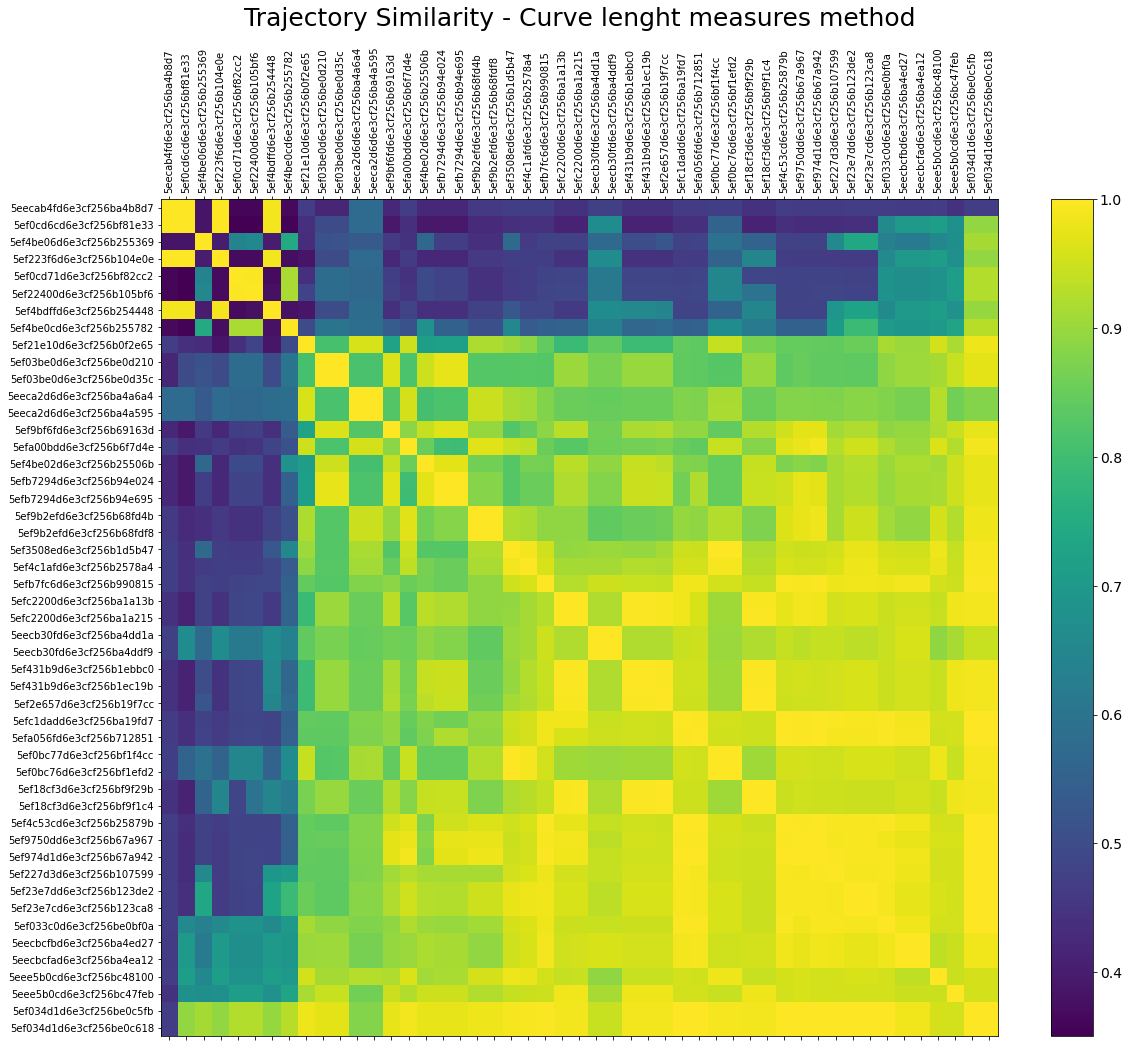

In [15]:
df_clm_matrix = get_similarity_matrix(df_clm)
plot_similarity_matrix(df_clm_matrix,'Trajectory Similarity - Curve lenght measures method')

## Case Study 2 

As part of our work we implemented a generalization method for tracks. This method is going to reduce the number of original points of the tracks and in consequence the tracks are not going to be identical. So the purpose of this case-study is to determine how the generalization methods impact the shape of the original trajectory. First let's request 10 tracks to the envirocar api and create a trajectoryCollection from them.

In [9]:
track_df = track_api.get_tracks(bbox=bbox, num_results=10)
trajCollection = preprocessing.trajectoryCollection(track_df, 100)

Finished creating 9 trajectories


Now generalize the trajectories using the DouglasPeuckerGeneralizer.

In [10]:
generalized_trajCollection = DouglasPeuckerGeneralizer(trajCollection).generalize(0.001, ['Speed.value'])

Now let's select just one trajectory and its generalized track:

In [11]:
trajA=trajCollection.trajectories[1]
trajA_gen=generalized_trajCollection.trajectories[1]

And now we can compare both trajectories :

In [12]:
print('##### Track:',trajA.df['track.id'].unique()[0],"and Generalized ",trajA_gen.df['track.id'].unique()[0],"#####")
print('Similarity with pmc method:\t\t',track_similarity(trajA,trajA_gen,'pcm'))
print('Similarity with area method:\t\t',track_similarity(trajA,trajA_gen,'area_between_two_curves'))
print('Similarity with length method:\t\t',track_similarity(trajA,trajA_gen,'curve_length_measure'))
print('Similarity with frechet method:\t\t',track_similarity(trajA,trajA_gen,'frechet_dist'))
print('Similarity with DTW method\t\t',track_similarity(trajA,trajA_gen,'dtw'))

##### Track: 5efc1dadd6e3cf256ba19fd7 and Generalized  5efc1dadd6e3cf256ba19fd7 #####
Similarity with pmc method:		 0.5601095723440792
Similarity with area method:		 0.9999983022393455
Similarity with length method:		 0.9998446020860321
Similarity with frechet method:		 0.9978570472616219
Similarity with DTW method		 0.9926617766766201


We can also compare it visually ! At a small scale they seem identical but if you explore it with detail you are going to notice major differences. Those are the differences reflected in the previous similarity measures.

In [13]:
trajA.hvplot(line_width=7.0,line_color='orange', title='Original trajectory',tiles='StamenTonerBackground',width=450, height=400)+trajA_gen.hvplot(line_width=7.0, title='Generalized trajectory',tiles='StamenTonerBackground',width=450, height=400)

:Layout
   .Overlay.I  :Overlay
      .Tiles.I :Tiles   [x,y]
      .Path.I  :Path   [Longitude,Latitude]
   .Overlay.II :Overlay
      .Tiles.I :Tiles   [x,y]
      .Path.I  :Path   [Longitude,Latitude]

We can also compare the similarity of original trajCollections and the generalized collections. The following method will compare side by side the trajectory Collections with the desired method.

In [14]:
trajCollections_similarity(generalized_trajCollection,trajCollection,'curve_length_measure')

,Generalized_Trajectory_1,Trajectory_2,Similarity
0,5efb7fc6d6e3cf256b990815,5efb7fc6d6e3cf256b990815,0.999980
1,5efc1dadd6e3cf256ba19fd7,5efc1dadd6e3cf256ba19fd7,1.000000
2,5efc2200d6e3cf256ba1a13b,5efc2200d6e3cf256ba1a13b,0.999765
3,5efc2200d6e3cf256ba1a215,5efc2200d6e3cf256ba1a215,0.999766
4,5efcaab4d6e3cf256bb83e20,5efcaab4d6e3cf256bb83e20,0.999273
5,5efcaab4d6e3cf256bb848c9,5efcaab4d6e3cf256bb848c9,0.999269
6,5efd8e94d6e3cf256bdfea82,5efd8e94d6e3cf256bdfea82,1.000000
7,5efd9612d6e3cf256be6d5d5,5efd9612d6e3cf256be6d5d5,0.999769
8,5efd9a32d6e3cf256be78382,5efd9a32d6e3cf256be78382,1.000000


As you can see by using the 'curve_length_measure' method of similarity all generalized trajectories maintain high similarity values (i.e close to 1).